In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import xgboost as xgb
import matplotlib.pyplot as plt

X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
y_train = pd.read_csv('../data/y_train.csv')
y_test = pd.read_csv('../data/y_test.csv')

In [2]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print("Original features:", X_train.shape[1])
print("Polynomial features:", X_train_poly.shape[1])

Original features: 8
Polynomial features: 44


Random Forest with Polynomial Features R²: 0.8770668254674214


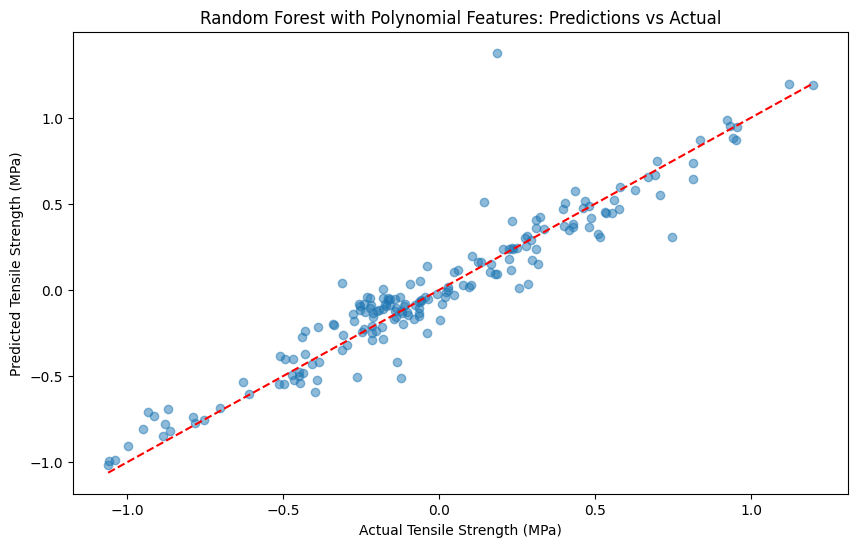

In [4]:
rf_poly = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
rf_poly.fit(X_train_poly, y_train)
y_pred_poly = rf_poly.predict(X_test_poly)

r2_poly = r2_score(y_test, y_pred_poly)
print("Random Forest with Polynomial Features R²:", r2_poly)

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test[' Tensile Strength (MPa)'], y_pred_poly[:, 0], alpha=0.5)
plt.plot([y_test[' Tensile Strength (MPa)'].min(), y_test[' Tensile Strength (MPa)'].max()],
         [y_test[' Tensile Strength (MPa)'].min(), y_test[' Tensile Strength (MPa)'].max()], 'r--')
plt.xlabel('Actual Tensile Strength (MPa)')
plt.ylabel('Predicted Tensile Strength (MPa)')
plt.title('Random Forest with Polynomial Features: Predictions vs Actual')
plt.show()